<a href="https://colab.research.google.com/github/leyanetpiedra/PDI/blob/main/Pr%C3%A1ctica_3_Operaciones_aritm%C3%A9ticas_y_l%C3%B3gicas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parte I.- Operaciones aritméticas**

EJERCICIO 1: SUMA DE IMAGENES

Saving Radiografia 1.png to Radiografia 1 (11).png
Saving Radiografia 2.png to Radiografia 2 (11).png


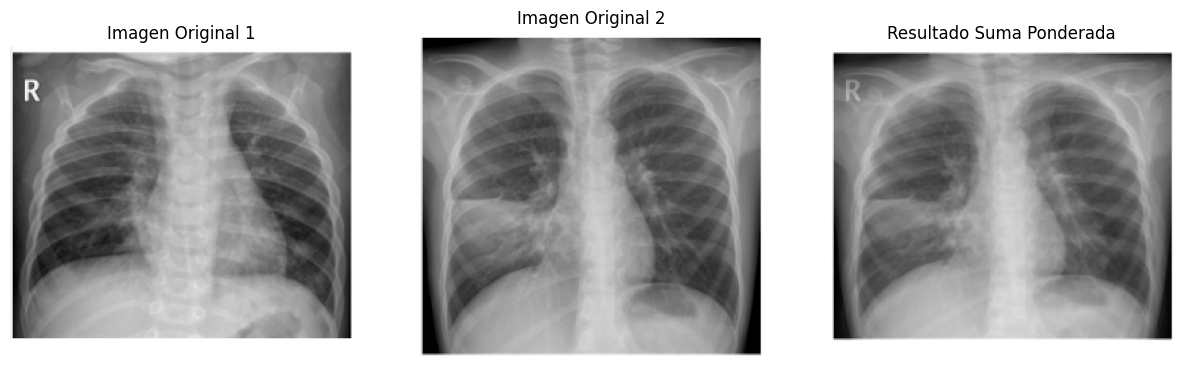

In [13]:
# SUMA PONDERADA

# Librerías
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Subir imágenes
from google.colab import files
uploaded = files.upload()
imagen1 = cv2.imread("Radiografia 1.png", cv2.IMREAD_GRAYSCALE)
imagen2 = cv2.imread("Radiografia 2.png", cv2.IMREAD_GRAYSCALE)

# Redimensionar imagen2 al tamaño de imagen1
imagen2_res = cv2.resize(imagen2, (imagen1.shape[1], imagen1.shape[0]))

# Suma ponderada
alpha = 0.3  # Peso de la primera imagen
beta = 0.7   # Peso de la segunda imagen
gamma = 10   # Ajuste de brillo

imagen_resultado = cv2.addWeighted(imagen1, alpha, imagen2_res, beta, gamma)

# Mostrar imágenes
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(imagen1, cmap="gray")
plt.title("Imagen Original 1")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(imagen2, cmap="gray")
plt.title("Imagen Original 2")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(imagen_resultado, cmap="gray")
plt.title("Resultado Suma Ponderada")
plt.axis("off")

plt.show()


Saving Radiografia 1.png to Radiografia 1 (12).png
Saving Radiografia 2.png to Radiografia 2 (12).png


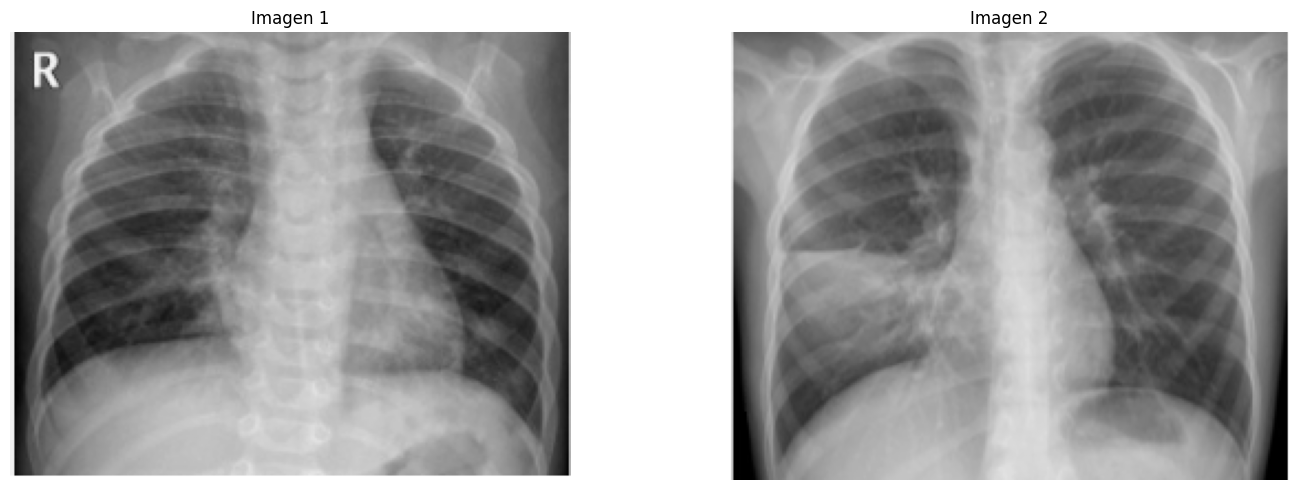

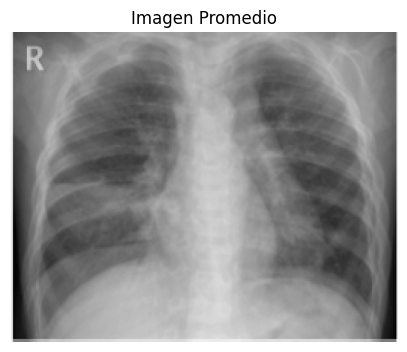

In [14]:
# SUMA PROMEDIO

# Subir imágenes
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()

# Convertir los nombres de archivo en una lista
imagenes = list(uploaded.keys())

# Cargar las imágenes en escala de grises
imagenes_cargadas = [cv2.imread(nombre, cv2.IMREAD_GRAYSCALE) for nombre in imagenes]

# Verificar que todas las imágenes tengan el mismo tamaño (redimensionar si no)
alto, ancho = imagenes_cargadas[0].shape
imagenes_cargadas = [cv2.resize(img, (ancho, alto)) for img in imagenes_cargadas]

# Crear una imagen acumuladora en formato float32
suma = np.zeros((alto, ancho), dtype=np.float32)

# Sumar todas las imágenes
for img in imagenes_cargadas:
    suma += img

# Calcular la imagen promedio
imagen_promedio = suma / len(imagenes_cargadas)
imagen_promedio = cv2.convertScaleAbs(imagen_promedio)

# Mostrar imágenes originales
plt.figure(figsize=(15, 5))
for i, img in enumerate(imagenes_cargadas):
    plt.subplot(1, len(imagenes_cargadas), i+1)
    plt.imshow(img, cmap="gray")
    plt.title(f"Imagen {i+1}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# Mostrar imagen promedio
plt.figure(figsize=(5, 5))
plt.imshow(imagen_promedio, cmap="gray")
plt.title("Imagen Promedio")
plt.axis("off")
plt.show()


EJERCICIO 2: RESTA DE IMAGENES

Saving Radiografia 1.png to Radiografia 1 (13).png
Saving Radiografia 2.png to Radiografia 2 (13).png


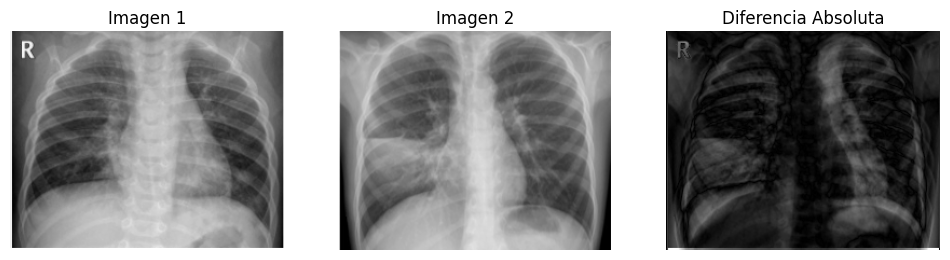

In [15]:
# Subir las imágenes
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()

imagenes = list(uploaded.keys())

# Cargar las dos imágenes en escala de grises
img1 = cv2.imread(imagenes[0], cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(imagenes[1], cv2.IMREAD_GRAYSCALE)

# Asegurar que tengan el mismo tamaño
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Usar diferencia absoluta para evitar valores negativos
resta = cv2.absdiff(img2, img1)

# Mostrar imágenes originales y resultado
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title("Imagen 1")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title("Imagen 2")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(resta, cmap='gray')
plt.title("Diferencia Absoluta")
plt.axis("off")

plt.show()



EJERCICIO 3: MULTIPLICACION POR UN FACTOR

Saving Radiografia 1.png to Radiografia 1 (14).png
Saving Radiografia 2.png to Radiografia 2 (14).png


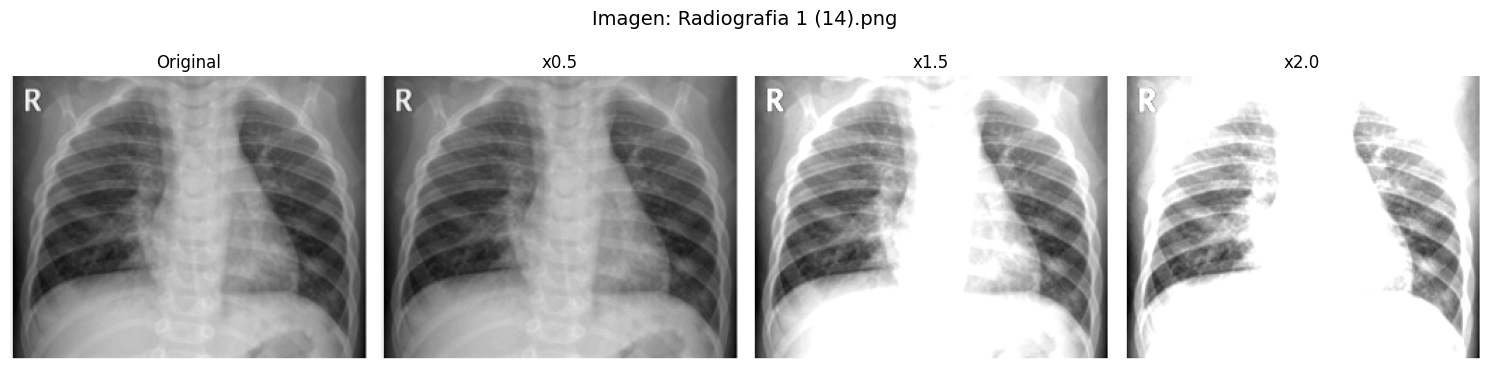

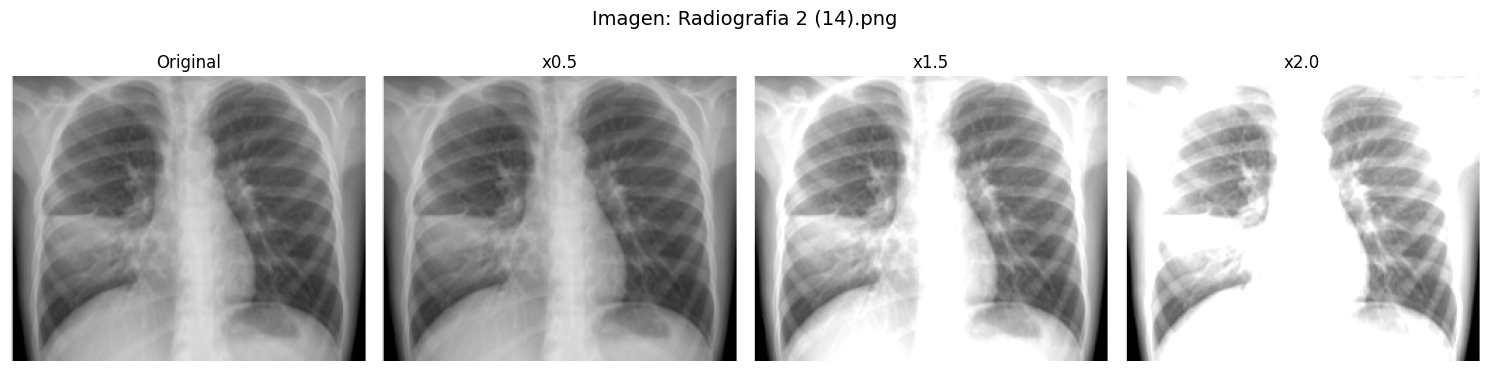

In [16]:
# Subir imágenes
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()
imagenes = list(uploaded.keys())

# Leer imágenes en escala de grises
img1 = cv2.imread(imagenes[0], cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(imagenes[1], cv2.IMREAD_GRAYSCALE)

# Factores de brillo a aplicar
factores = [0.5, 1.5, 2.0]

# Función para aplicar y convertir imagen
def ajustar_brillo(img, factor):
    resultado = cv2.multiply(img, np.array([factor], dtype=np.float32))
    return cv2.convertScaleAbs(resultado)

# Mostrar resultados para la primera imagen
plt.figure(figsize=(15, 4))
plt.suptitle(f"Imagen: {imagenes[0]}", fontsize=14)
plt.subplot(1, 4, 1)
plt.imshow(img1, cmap='gray')
plt.title("Original")
plt.axis("off")

for i, f in enumerate(factores):
    img_mod = ajustar_brillo(img1, f)
    plt.subplot(1, 4, i+2)
    plt.imshow(img_mod, cmap='gray')
    plt.title(f"x{f}")
    plt.axis("off")

plt.tight_layout()
plt.show()

# Mostrar resultados para la segunda imagen
plt.figure(figsize=(15, 4))
plt.suptitle(f"Imagen: {imagenes[1]}", fontsize=14)
plt.subplot(1, 4, 1)
plt.imshow(img2, cmap='gray')
plt.title("Original")
plt.axis("off")

for i, f in enumerate(factores):
    img_mod = ajustar_brillo(img2, f)
    plt.subplot(1, 4, i+2)
    plt.imshow(img_mod, cmap='gray')
    plt.title(f"x{f}")
    plt.axis("off")

plt.tight_layout()
plt.show()


EJERCICIO 4: MULTIPLICACION ELEMENTO POR ELEMENTO

Saving Radiografia 1.png to Radiografia 1 (15).png
Saving Radiografia 2.png to Radiografia 2 (15).png


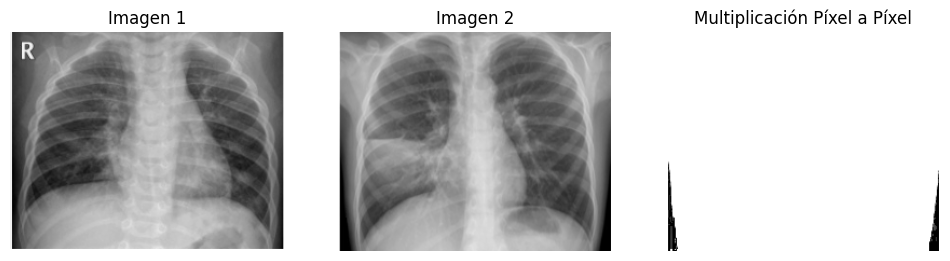

In [17]:
# Subir imágenes
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()

imagenes = list(uploaded.keys())

# Cargar las imágenes en escala de grises
img1 = cv2.imread(imagenes[0], cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(imagenes[1], cv2.IMREAD_GRAYSCALE)

# Redimensionar la segunda imagen al tamaño de la primera
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Multiplicación elemento a elemento
img_multiplicada = cv2.multiply(img1, img2)

# Convertir a uint8 para visualización correcta
img_multiplicada = cv2.convertScaleAbs(img_multiplicada)

# Mostrar imágenes originales y resultado
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title("Imagen 1")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title("Imagen 2")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_multiplicada, cmap='gray')
plt.title("Multiplicación Píxel a Píxel")
plt.axis("off")

plt.show()


# **Parte II.- Operaciones lógicas**

Saving Radiografia 1.png to Radiografia 1 (10).png
Saving Radiografia 2.png to Radiografia 2 (10).png


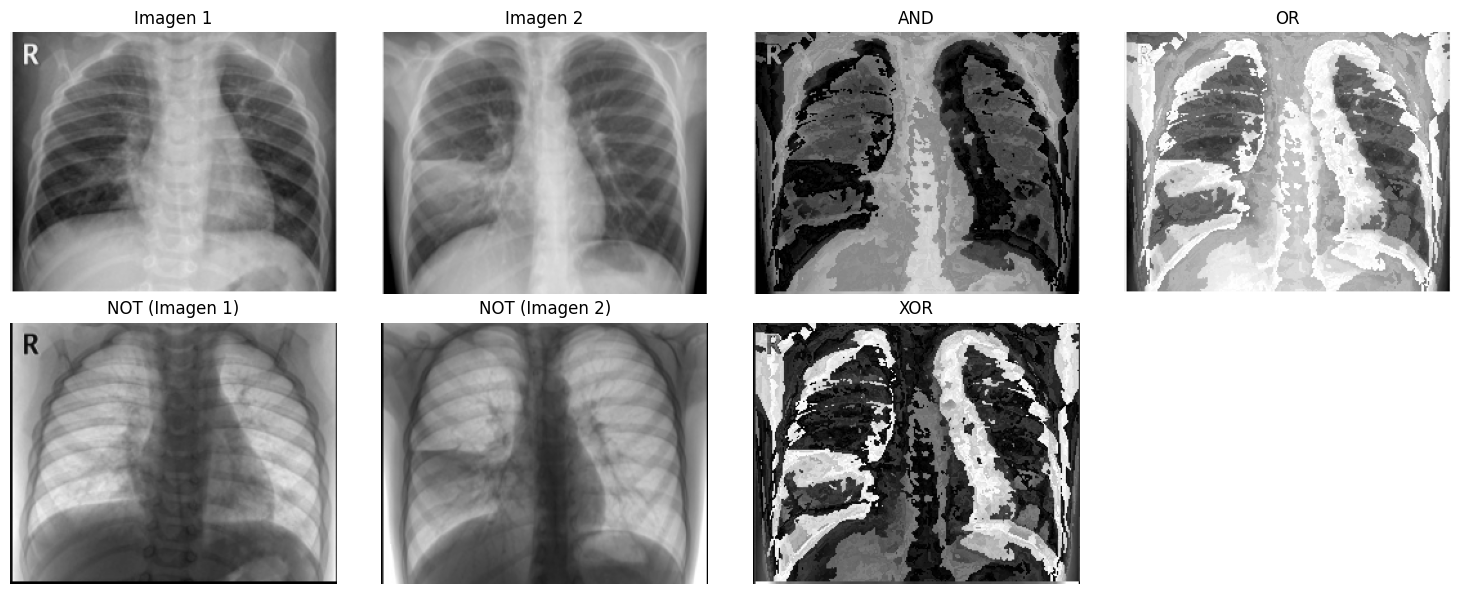

In [12]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Subir dos imágenes
uploaded = files.upload()

# Obtener los nombres de los archivos subidos
nombres = list(uploaded.keys())

# Cargar las dos imágenes en escala de grises
img1 = cv2.imread(nombres[0], cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(nombres[1], cv2.IMREAD_GRAYSCALE)

# Redimensionar img2 para que tenga el mismo tamaño que img1
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Aplicar operaciones lógicas
and_img = cv2.bitwise_and(img1, img2)
or_img = cv2.bitwise_or(img1, img2)
not_img1 = cv2.bitwise_not(img1)
not_img2 = cv2.bitwise_not(img2)
xor_img = cv2.bitwise_xor(img1, img2)

# Mostrar las imágenes
titles = ["Imagen 1", "Imagen 2", "AND", "OR", "NOT (Imagen 1)", "NOT (Imagen 2)", "XOR"]
images = [img1, img2, and_img, or_img, not_img1, not_img2, xor_img]

plt.figure(figsize=(15, 6))

for i in range(len(images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()
